In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/ichra/OneDrive - Ecole Marocaine des Sciences de l'Ingénieur/Bureau/tp_lb_dl/tp_lb_dl/ichouenv/lab1/fruits/fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/ichra/OneDrive - Ecole Marocaine des Sciences de l'Ingénieur/Bureau/tp_lb_dl/tp_lb_dl/ichouenv/lab1/fruits/fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/ichra/OneDrive - Ecole Marocaine des Sciences de l'Ingénieur/Bureau/tp_lb_dl/tp_lb_dl/ichouenv/lab1/fruits/fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


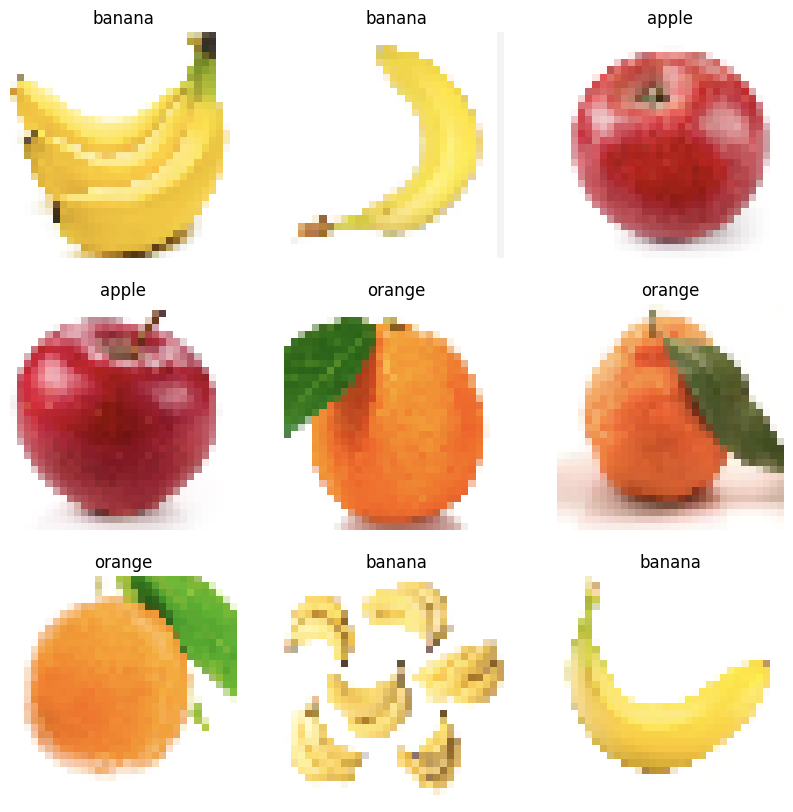

In [5]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [8]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5370 - loss: 0.9520 - val_accuracy: 0.7273 - val_loss: 0.7782
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7609 - loss: 0.5991 - val_accuracy: 0.8030 - val_loss: 0.4983
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8478 - loss: 0.3729 - val_accuracy: 0.8939 - val_loss: 0.2891
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9000 - loss: 0.3013 - val_accuracy: 0.8636 - val_loss: 0.3383
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9348 - loss: 0.2096 - val_accuracy: 0.8788 - val_loss: 0.2877
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9500 - loss: 0.1458 - val_accuracy: 0.9242 - val_loss: 0.1488
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9413 - loss: 0.1474 - val_accuracy: 0.9697 - val_loss: 0.1082
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9391 - loss: 0.1362 - val_accuracy: 0.9545 - val_loss: 0.

In [9]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9077 - loss: 0.2850


[0.285037636756897, 0.9076923131942749]

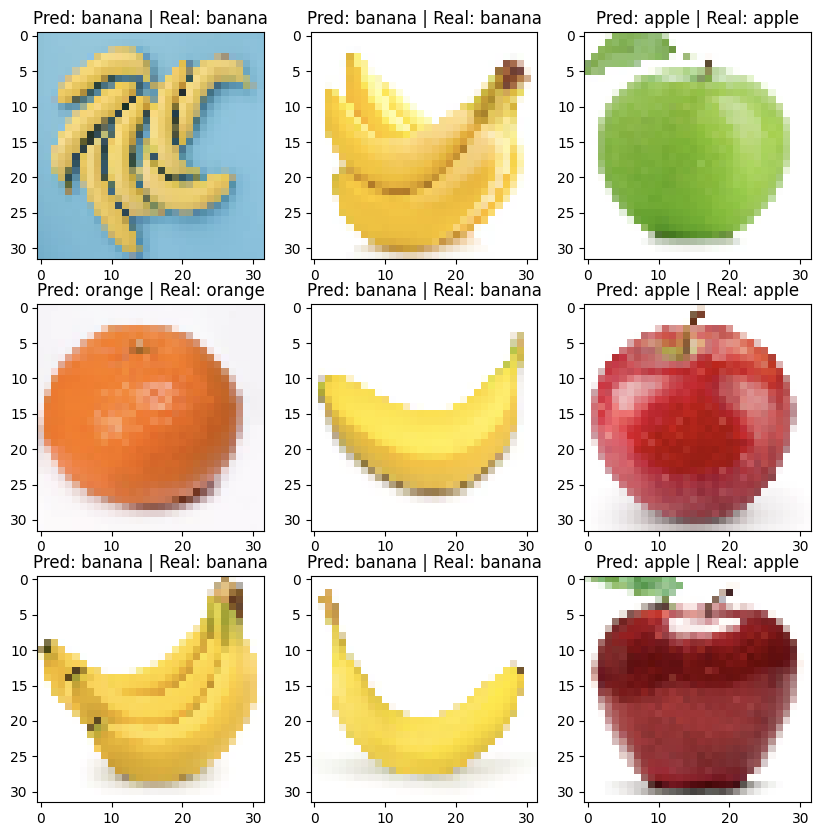

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ichra\AppData\Local\Temp\tmpsl43pkqw\assets


INFO:tensorflow:Assets written to: C:\Users\ichra\AppData\Local\Temp\tmpsl43pkqw\assets


Saved artifact at 'C:\Users\ichra\AppData\Local\Temp\tmpsl43pkqw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  3220848334544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848331664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848338960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848339152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848331856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848339344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848343760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848509776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848343568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3220848514000: TensorSpec(shape=(), dtype=tf.resource, name=None)
